In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(df)

    length   height   width
0      8.4     2.11    1.41
1     13.7     3.53    2.00
2     15.0     3.82    2.43
3     16.2     4.59    2.63
4     17.4     4.59    2.94
5     18.0     5.22    3.32
6     18.7     5.20    3.12
7     19.0     5.64    3.05
8     19.6     5.14    3.04
9     20.0     5.08    2.77
10    21.0     5.69    3.56
11    21.0     5.92    3.31
12    21.0     5.69    3.67
13    21.3     6.38    3.53
14    22.0     6.11    3.41
15    22.0     5.64    3.52
16    22.0     6.11    3.52
17    22.0     5.88    3.52
18    22.0     5.52    4.00
19    22.5     5.86    3.62
20    22.5     6.79    3.62
21    22.7     5.95    3.63
22    23.0     5.22    3.63
23    23.5     6.28    3.72
24    24.0     7.29    3.72
25    24.0     6.38    3.82
26    24.6     6.73    4.17
27    25.0     6.44    3.68
28    25.6     6.56    4.24
29    26.5     7.17    4.14
30    27.3     8.32    5.14
31    27.5     7.17    4.34
32    27.5     7.05    4.34
33    27.5     7.28    4.57
34    28.0     7.82 

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit([[2,3]])#학습
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [5]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names_out()
test_poly=poly.transform(test_input)

(42, 9)


In [7]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,train_target)
lr_pre=lr.predict(train_poly)
print(lr.score(train_poly,train_target))
print('테스트 세트:',lr.score(test_poly,test_target))
print(lr.coef_,lr.intercept_)

0.9903183436982124
테스트 세트: 0.9714559911594134
[  34.80604039  -88.68430232 -184.11606694   -2.2696004     8.74890226
    9.41670602   27.76120631 -119.89306061   93.68198334] 124.06521772230127


In [8]:
# import matplotlib.pyplot as plt
# # Aa1=int(input('길이입력:'))
# # Bb1=lr.predict([[Aa1**2,Aa1]])
# # point=np.arange(15,50)
# plt.scatter(train_poly,train_target)
# # plt.plot(point,1.01*point**2-21.6*point+116.05)
# # plt.scatter(Aa1,Bb1,marker='^')
# plt.xlabel('length')
# plt.ylabel('weight')
# plt.show()

In [9]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print('테스트 세트:',lr.score(test_poly,test_target))

0.9999999999991097
테스트 세트: -144.40579242684848


In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [11]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
ridge_pre=ridge.predict(train_scaled)
print(ridge.score(train_scaled,train_target))
print('테스트 세트:',ridge.score(test_scaled,test_target))

0.9896101671037343
테스트 세트: 0.9790693977615397


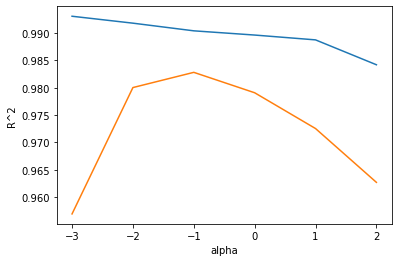

In [12]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')                               
plt.ylabel('R^2') 
plt.show()
                            

0.9559318325530065
테스트 세트: 0.879425790709324


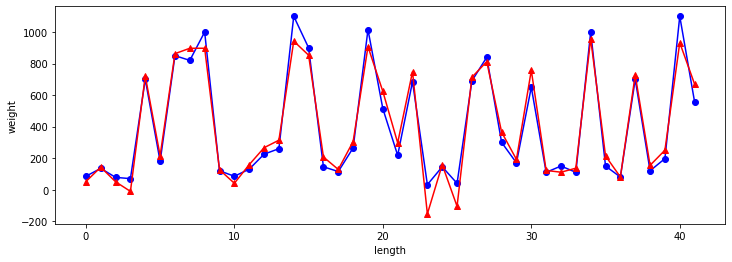

[ 9.2935171  68.84007095 37.92185148] -599.9624308077007


In [20]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_input,train_target)
ridge_pre=ridge.predict(train_input)
print(ridge.score(train_input,train_target))
print('테스트 세트:',ridge.score(test_input,test_target))



fig=plt.figure(figsize=(12,4))
graph=fig.add_subplot(1,1,1)
graph.plot(train_target,marker='o',color='blue')
graph.plot(ridge_pre,marker='^',color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(ridge.coef_,ridge.intercept_)
# print(lasso.coef_,lasso.intercept_)

0.9888067471131867
테스트 세트: 0.9824470598706695
40


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


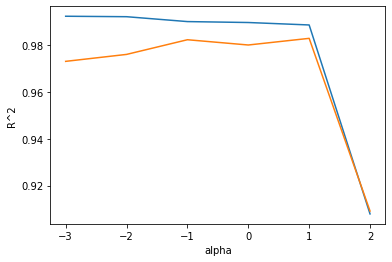

In [16]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print('테스트 세트:',lasso.score(test_scaled,test_target))
print(np.sum(lasso.coef_==0))
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  lasso=Lasso(alpha=alpha,max_iter=10000)
  lasso.fit(train_scaled,train_target)
  train_score.append(lasso.score(train_scaled,train_target))
  test_score.append(lasso.score(test_scaled,test_target))
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')                               
plt.ylabel('R^2') 
plt.show()


In [17]:
# a=input()
# print(a[0],a[1])
# print()
poly1=PolynomialFeatures()
poly1.fit(train_input)
print(poly1.get_feature_names_out())

['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
